In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import cp_comparitor


In [2]:
def my_function(**kwargs):
    #for key, value in kwargs.items():
    #print(kwargs.items())
    #key, value = kwargs.items()
    operator = kwargs.get('name')
    #dict_items['name']
    #name
    #ame = kwargs.name
    print(operator)
#rint(name)        
# Example usage
my_function(name="John", age=30, city="New York")

John


In [37]:
vec1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,3,4,3,3,3,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vec2 = np.array([0,1,1,1,2,2,3,3,4,3,3,3,2,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0])

vect1 = np.array([0,0,0,0,1,2,3,4,3,2,1,0])
vect2 = np.array([0,1,2,3,4,3,2,1,0,0,0,0])
def spearman_offset(comparitee_vector, comparitor_vector, **kwargs):
    _window = kwargs.get('window')
    stat = []
    pvalue = []
    tee = comparitee_vector
    tor = comparitor_vector

    if len(tor)<len(tee[:_window]):
        print("Comparitor is shorter than comparitee, this won't do, try a shorter sequence") 
    else:
        for i in range(len(tor)-len(tee)):
            SigRes = (stats.spearmanr(tor[i:i+_window],tee[:_window]))
            stat.append(SigRes.statistic)
            pvalue.append(SigRes.pvalue)
        statAray = np.array(stat)
        statAray = np.nan_to_num(statAray, nan=0.0)
        
        pvalueAray = np.array(pvalue)
        pvalueAray = np.nan_to_num(pvalueAray, nan=1)
        print(statAray,pvalueAray)
    return np.mean([statAray.argmax(), pvalueAray.argmin()])

spearman_offset(vec2, vec1, window=6)

[ 0.          0.          0.          0.          0.          0.
  0.          0.56568542  0.89442719  0.73786479  0.76666667  1.
  0.78333333  0.90369611  0.87400737  0.76666667  0.36514837 -0.14142136
 -0.45643546 -1.         -0.73786479 -0.76666667] [1.         1.         1.         1.         1.         1.
 1.         0.24198153 0.01613009 0.09406601 0.07531481 0.
 0.06533102 0.01346508 0.0228112  0.07531481 0.47662067 0.78928218
 0.36289216 0.         0.09406601 0.07531481]


c:\Users\ada55080\.conda\envs\pymc_env\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


11.0

In [5]:
#cp_comparitor.Cosine(vec1[11:18], vec2[:7])
vec3 = [1,2,3,5,8,13,21,34]
vectee = np.vstack((vec3, vec2[:8]))
vector = np.vstack((vec3, vec2[:8]))
test = cp_comparitor.cpCompConstructor(vector)
corr = cp_comparitor.cpCorrelation(vectee, vector, operator='cosine', thresh=0.9999)
#test

*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH0.9999999999999998
*****MATCH1.0
*****MATCH1.0000000000000002
*****MATCH1.0
*****MATCH1.0
*****MATCH1.0
*****MATCH1.0000000000000002


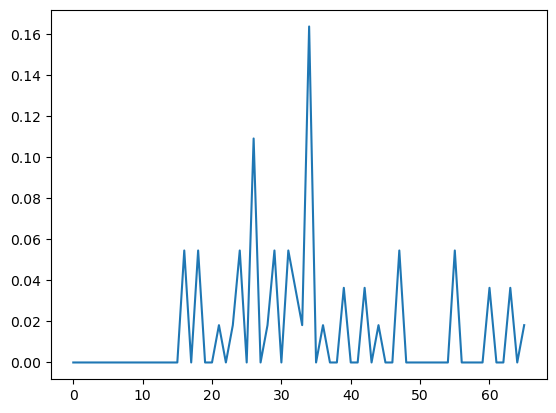

In [6]:
plt.plot(corr)

In [14]:
# import fastdtw
# import scipy.spatial.distance as sd

# def my_fastdtw(x, y):
#     return fastdtw.fastdtw(x,y)[0]

# distance_matrix = sd.pdist(y,my_fastdtw)

np.arange(4).reshape(2,2)

array([[0, 1],
       [2, 3]])

In [17]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw
#_log_choice = 'Roll_Avg_RHOB'
#f1B_DTW = data_f1B['DEPTH',_log_choice][_log_extent_min[1]:_log_extent_max[1]].to_numpy()
#f11A_DTW = data_f11A[_log_choice][_log_extent_min[3]:_log_extent_max[3]].to_xarray()
#f1A_DTW = data_f1A[_log_choice][_log_extent_min[0]:_log_extent_max[0]].to_xarray()
#x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
#y = np.array([[2,2], [3,3], [4,4]])


#y = np.column_stack((data_f1B[_log_extent_min[1]:_log_extent_max[1]].index, data_f1B[_log_choice][_log_extent_min[1]:_log_extent_max[1]]))
#x = np.column_stack((data_f11A[_log_extent_min[3]:_log_extent_max[3]].index, data_f11A[_log_choice][_log_extent_min[3]:_log_extent_max[3]]))
# distance, path = fastdtw(x, y, dist=euclidean)
# print(distance)
# plt.plot(path)
#


def dtw_offset(comparitee_vector, comparitor_vector, **kwargs):
    _window = kwargs.get('window')
    distance = []
    path = []
    tee = comparitee_vector
    tor = comparitor_vector
    iter = len(tor)-len(tee)
    if len(tor)<len(tee[:_window]):
        print("Comparitor is shorter than comparitee, this won't do, try a shorter sequence") 
    else:
        for i in range(iter):
            _distance, _path = fastdtw(tor[i:i+_window],tee[:_window], dist=euclidean)
            distance.append(_distance)
            path.append(_path)
        distanceAray = np.array(distance)
        #statAray = np.nan_to_num(statAray, nan=0.0)
        
        #pathAray = np.array(path)#.reshape(_window,iter)
        #pvalueAray = np.nan_to_num(pvalueAray, nan=1)
        #print('statArgmax= ' + str(statAray.argmax()) + ' val ' + str(statAray[statAray.argmax()]))
        #print('pvalArgmin= ' + str(pvalueAray.argmin()) + ' val ' + str(pvalueAray[pvalueAray.argmin()]))
        #print
    return distanceAray, path

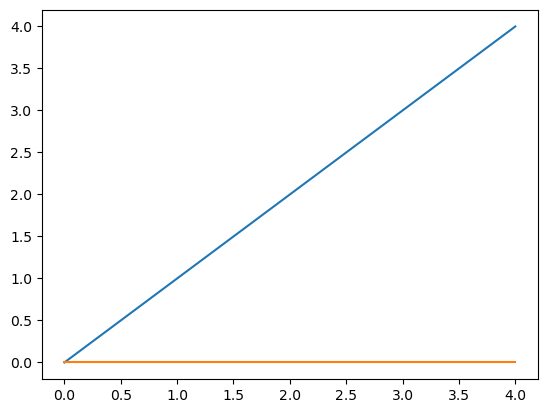

In [93]:
y = np.column_stack((np.arange(len(vec2)),vec2))
x = np.column_stack((np.arange(len(vec1)),vec1))
# distance, path = fastdtw(x, y, dist=euclidean)

dist, path = dtw_offset(y[:1],x[:8], window=7)

#print(dist, path)
#patharay = np.array(path[0])
dist, path



In [64]:
vect1 = np.array([0,0,0,0,1,2,3,4,3,2,1,0])
vect2 = np.array([0,1,2,3,4,3,2,1,0,0,0,0])

yY = np.column_stack((np.arange(len(vect2[:5])),vect2[:5]))
xX = np.column_stack((np.arange(len(vect1[3:9])),vect1[3:9]))

_distance, _path = fastdtw(yY,xX, dist=euclidean)

_distance, _path

(1.4142135623730951, [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (4, 5)])